# Seventh homework for computational mathematics course

In [1]:
import numpy as np
import pandas as pd
import pylab as plt
from scipy.optimize import minimize
from scipy.signal import argrelextrema

from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit

## Exercise 1

Parabola:
$$
y = w_2x^2 + w_1x + w_0
$$
Hyperbola:
$$
y^2 = w_2(x-w_1)^2 + w_0
$$

In [40]:
def parabola(y, x, tol=1e-8):
    w = [0,0,0]
    J0 = np.ones(np.shape(x))
    
    fun = lambda w: y - w[2]*x**2 - w[1]*x - w[0]*J0
    
    while(np.sum(fun(w)**2) > tol):
        J1 = x.copy().reshape(-1, 1)
        J2 = (x**2).reshape(-1, 1)
        J = np.concatenate([J0.reshape(-1, 1), J1, J2], axis=1)
        w = w + np.linalg.inv(J.T@J)@J.T@fun(w)
        print("Error is:",np.sum(fun(w)**2))
    
    return w
    

In [41]:
x = np.linspace(1, 10, 1000)
y = 0.7*x**2 + 8.9*x - 5.4
w = parabola(y, x)
w

1.4088185858772647e-21


array([-5.4,  8.9,  0.7])

In [68]:
def hyperbola(y, x, tol=1e-8):
    w = [1,1,1]
    J0 = np.ones(np.shape(x))
    
    fun = lambda w: y**2 - w[2]*(x - w[1]*J0)**2 - w[0]*J0
    
    while(np.sum(fun(w)**2) > tol):
        J1 = (-2*w[2]*(x - w[1]*J0)).reshape(-1, 1)
        J2 = ((x - w[1]*J0)**2).reshape(-1, 1)
        J = np.concatenate([J0.reshape(-1, 1), J1, J2], axis=1)
        w = w + np.linalg.inv(J.T@J)@J.T@fun(w)
        print("Error is:",np.sum(fun(w)**2))
    
    return w

In [69]:
x = np.linspace(2, 7, 1000)
y = np.sqrt(3.4*(x-5.6)**2 + 2.2)
w = hyperbola(y, x)
w

Error is: 335435461.44570583
Error is: 171725238.28357413
Error is: 2.3391991191943e-22


array([2.2, 5.6, 3.4])

## Exercise 2

In [75]:
def newton(z0, f, fprime, MAX_IT=1000, TOL=1e-8):
    """The Newton-Raphson method applied to f(z).

    Returns the root found, starting with an initial guess, z0, or False
    if no convergence to tolerance TOL was reached within MAX_IT iterations.

    """

    z = z0
    errors = []
    for i in range(MAX_IT):
        
        # Вместо всей этой секции z = optimize.newton(f, z0, fprime)
        
        dz = f(z)/fprime(z)
        errors.append(abs(dz))
        if abs(dz) < TOL:
            return z, errors
        z -= dz
    return False

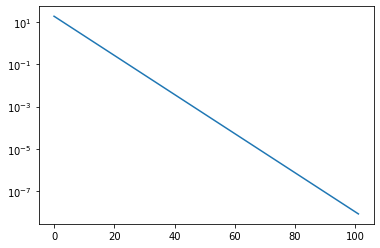

In [76]:
f = lambda z: np.abs(z)**(5/2)
fprime = lambda z: 5.2*np.abs(z)**(1/2)*z
z, errors = newton(100, f, fprime)
plt.plot(errors)
plt.yscale('log')
plt.show()

## Exercise 3

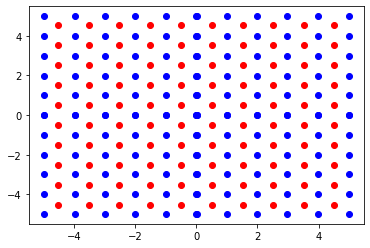

In [61]:
x = np.linspace(-5, 5, 500)

X = []

for p in x:
    for l in x:
        X.append([p,l])
        
X = np.array(X).T
fx = fun(X)
fx = fx.reshape(500, 500)

idx_min = []
idy_min = []
idx_max = []
idy_max = []

for i in range(1, 499):
    for j in range(1, 499):
        if fx[i][j] <= fx [i+1][j] and fx[i][j] <= fx[i-1][j] and fx[i][j] <= fx [i][j-1] and fx[i][j] <= fx[i][j+1]:
            idx_min.append(i)
            idy_min.append(j)
            
        if fx[i][j] >= fx [i+1][j] and fx[i][j] >= fx[i-1][j] and fx[i][j] >= fx [i][j-1] and fx[i][j] >= fx[i][j+1]:
            idx_max.append(i)
            idy_max.append(j)
        
plt.scatter(x[idx_min], x[idy_min], c='b')
plt.scatter(x[idx_max], x[idy_max], c='r')
plt.show()

## Exercise 4

In [86]:
x = np.array([0.1 , 0.10808081, 0.11616162, 0.12424242, 0.13232323,
0.14040404, 0.14848485, 0.15656566, 0.16464646, 0.17272727,
0.18080808, 0.18888889, 0.1969697 , 0.20505051, 0.21313131,
0.22121212, 0.22929293, 0.23737374, 0.24545455, 0.25353535,
0.26161616, 0.26969697, 0.27777778, 0.28585859, 0.29393939,
0.3020202 , 0.31010101, 0.31818182, 0.32626263, 0.33434343,
0.34242424, 0.35050505, 0.35858586, 0.36666667, 0.37474747,
0.38282828, 0.39090909, 0.3989899 , 0.40707071, 0.41515152,
0.42323232, 0.43131313, 0.43939394, 0.44747475, 0.45555556,
0.46363636, 0.47171717, 0.47979798, 0.48787879, 0.4959596 ,
0.5040404 , 0.51212121, 0.52020202, 0.52828283, 0.53636364,
0.54444444, 0.55252525, 0.56060606, 0.56868687, 0.57676768,
0.58484848, 0.59292929, 0.6010101 , 0.60909091, 0.61717172,
0.62525253, 0.63333333, 0.64141414, 0.64949495, 0.65757576,
0.66565657, 0.67373737, 0.68181818, 0.68989899, 0.6979798 ,
0.70606061, 0.71414141, 0.72222222, 0.73030303, 0.73838384,
0.74646465, 0.75454545, 0.76262626, 0.77070707, 0.77878788,
0.78686869, 0.79494949, 0.8030303 , 0.81111111, 0.81919192,
0.82727273, 0.83535354, 0.84343434, 0.85151515, 0.85959596,
0.86767677, 0.87575758, 0.88383838, 0.89191919, 0.9 ])
y = np.array([-2.24812911, -2.30215341, -2.34463875, -2.38651064, -2.43190693,
-2.44713884, -2.49003176, -2.51006098, -2.55831541, -2.57056931,
-2.59340317, -2.64026441, -2.65975636, -2.69517476, -2.71046599,
-2.74422696, -2.76251291, -2.79505506, -2.79301352, -2.82852207,
-2.854651 , -2.88654236, -2.92345136, -2.91943321, -2.94240833,
-2.9487781 , -2.97926813, -2.99198343, -3.03396292, -3.03814694,
-3.04944858, -3.07196161, -3.09883706, -3.11338258, -3.11898122,
-3.14254571, -3.18330957, -3.17453301, -3.20021237, -3.21213539,
-3.23715191, -3.24017664, -3.23640684, -3.26147762, -3.28208909,
-3.29453546, -3.31160478, -3.33188752, -3.33320305, -3.35238927,
-3.34176317, -3.37471911, -3.37543159, -3.40452694, -3.40505804,
-3.43358858, -3.43596139, -3.43705603, -3.45264647, -3.46029402,
-3.45723979, -3.4720453 , -3.47597438, -3.4795529 , -3.50118552,
-3.5031452 , -3.5097196 , -3.51083668, -3.51128397, -3.52708836,
-3.5222885 , -3.53317295, -3.50965143, -3.51939652, -3.51659198,
-3.50734187, -3.50882329, -3.48129755, -3.49384658, -3.48813707,
-3.48345018, -3.46180698, -3.44784696, -3.42372263, -3.39080674,
-3.37867045, -3.35281766, -3.32575498, -3.28934964, -3.26814804,
-3.23547615, -3.1707224 , -3.12910072, -3.09300443, -3.02523152,
-2.9453774 , -2.89454317, -2.83662685, -2.75433056, -2.68946573])

In [108]:
def cross_val(cv, X, Y):
    errors = []
    omegas = []
    ress = []
    rs = ShuffleSplit(n_splits=cv, random_state=45)
    for Xtest_index in rs.split(X):
        X_train, X_test = X[Xtest_index[0]], X[Xtest_index[1]]
        y_train, y_test = Y[Xtest_index[0]], Y[Xtest_index[1]]

        fun = lambda w: mse(y_train, w[0]*X_train**w[1] + w[2]*X_train**w[3], squared=False)
        res = minimize(fun, [1,0,10,3], method = 'Nelder-Mead')
        w = res.x
        errors.append(mse(y_test, w[0]*X_test**w[1] + w[2]*X_test**w[3],
                          squared=False))
        ress.append(res)
        omegas.append(w)
    
    gd_mse = pd.DataFrame({'mse': errors, 'omega': omegas, 'res':ress})
    gd_mse = gd_mse.sort_values(by=['mse'], ascending=True, ignore_index=True)
    return gd_mse  

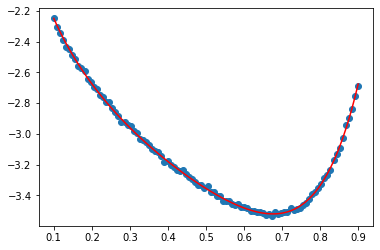

array([-3.99880025,  0.24990967,  2.99584499,  8.53534009])

In [109]:
df = cross_val(5, x, y)
w = df['omega'].iloc[0]
plt.plot(x, w[0]*x**w[1] + w[2]*x**w[3], c='r')
plt.scatter(x, y)
plt.show()
w

In [112]:
def normal(y, x, w, tol=1e-8):
    k = 0
    
    fun = lambda w: y - w[0]*x**w[1] - w[2]*x**w[3]
    
    while(np.sum(fun(w)**2) > tol):
        k +=1
        if k > 1e3:
            return w
        J1 = (x**w[1]).reshape(-1, 1)
        J2 = (w[0]*np.log(x)*x**w[1]).reshape(-1, 1)
        J3 = (x**w[3]).reshape(-1, 1)
        J4 = (w[2]*np.log(x)*x**w[3]).reshape(-1, 1)
        J = np.concatenate([J1, J2, J3, J4], axis=1)
        w = w + np.linalg.inv(J.T@J)@J.T@fun(w)
        print("Error is:",np.sum(fun(w)**2))
    
    return w

Error is: 0.007908448278005905
Error is: 0.007908444522310914
Error is: 0.007908444522236387
Error is: 0.007908444522236349
Error is: 0.007908444522236324
Error is: 0.007908444522236335
Error is: 0.007908444522236381
Error is: 0.007908444522236381
Error is: 0.007908444522236385
Error is: 0.007908444522236381
Error is: 0.007908444522236385
Error is: 0.007908444522236381
Error is: 0.007908444522236385
Error is: 0.007908444522236381
Error is: 0.007908444522236385
Error is: 0.007908444522236381
Error is: 0.007908444522236385
Error is: 0.007908444522236381
Error is: 0.007908444522236385
Error is: 0.007908444522236381
Error is: 0.007908444522236385
Error is: 0.007908444522236381
Error is: 0.007908444522236385
Error is: 0.007908444522236381
Error is: 0.007908444522236385
Error is: 0.007908444522236381
Error is: 0.007908444522236385
Error is: 0.007908444522236381
Error is: 0.007908444522236385
Error is: 0.007908444522236381
Error is: 0.007908444522236385
Error is: 0.007908444522236381
Error is

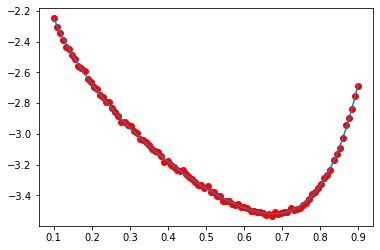

In [113]:
w_ = normal(y=y,x=x,w=w)
plt.plot(x, w[0]*x**w[1] + w[2]*x**w[3])
plt.scatter(x, y, c='r')
plt.show()